## Pandas и Matplotlib

Здесь мы обсудим совместное использование двух этих замечательных библиотек.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Создадим не слишком большой набор данных, с которым будем работать:

In [2]:
cities = {"name": ["Лондон", "Берлин", "Мадрид", "Рим", 
                   "Париж", "Вена", "Бухарест", "Гамбург", 
                   "Будапешт", "Варшава", "Барселона", 
                   "Мюнхен", "Милан"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "area" : [1572, 891.85, 605.77, 1285, 
                    105.4, 414.6, 228, 755, 
                    525.2, 517, 101.9, 310.4, 
                    181.8]
}

city_frame = pd.DataFrame(cities, columns=["population", "area"],
                          index=cities["name"])
city_frame

,population,area
Лондон,8615246,1572.00
Берлин,3562166,891.85
Мадрид,3165235,605.77
Рим,2874038,1285.00
Париж,2273305,105.40
Вена,1805681,414.60
Бухарест,1803425,228.00
Гамбург,1760433,755.00
Будапешт,1754000,525.20
Варшава,1740119,517.00


Метод `plot` объекта DataFrame в Pandas самостоятельно подключает и использует необходимые функции библиотеки Matplotlib:

<AxesSubplot:>

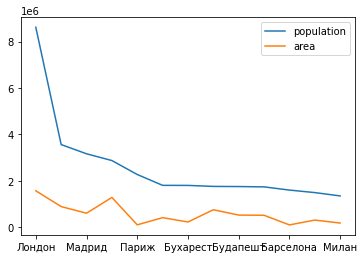

In [3]:
city_frame["area"] *= 1000
city_frame.plot()

Обратите внимание, что значения в колонке `area` были увеличены в 1000 раз. Без этого график слился бы с горизонтальной осью.

Плохо, что не все города оказались отмечены на горизонтальной оси. Это можо исправить:

<AxesSubplot:>

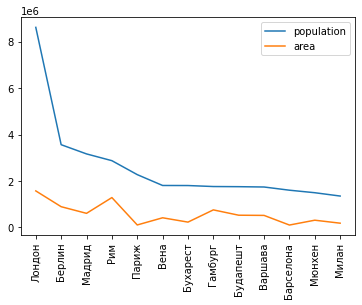

In [4]:
city_frame.plot(xticks=range(len(city_frame.index)),
                use_index=True, 
                rot=90)

Умножение величин столбца `area` на 1000 «испортило» нашу таблицу. Хотя таким образом мы и смогли 
получить её графическое предствление, это всё же весьма плохое решение. Лучше действовать иначе, но
сначала надо восстановить корректные значения площадей:

In [5]:
city_frame = pd.DataFrame(cities,
                          columns=["population", "area"],
                          index=cities["name"])

Для дальнейшего нам уже необходимо напрямую использовать функции библиотеки Matplotlib, что позволит
создать вторую «ось»:

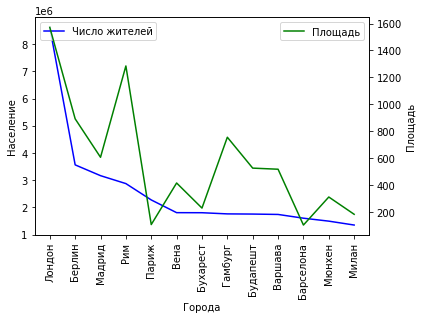

In [6]:
fig, ax = plt.subplots()
ax.set_ylabel("Население")
ax.set_xlabel("Города")

ax2 = ax.twinx()
ax2.set_ylabel("Площадь")

city_frame["population"].plot(ax=ax, 
                              style="b-",
                              xticks=range(len(city_frame.index)),
                              use_index=True, 
                              rot=90)

city_frame["area"].plot(ax=ax2, 
                        style="g-",
                        use_index=True, 
                        rot=90)

ax.legend(["Число жителей"], loc=2)
ax2.legend(["Площадь"], loc=1)
plt.show()

Добавим в нашу таблицу ещё одну колонку — плотность населения:

In [7]:
city_frame["density"] = city_frame["population"] / city_frame["area"]

city_frame

,population,area,density
Лондон,8615246,1572.00,5480.436387
Берлин,3562166,891.85,3994.131300
Мадрид,3165235,605.77,5225.143206
Рим,2874038,1285.00,2236.605447
Париж,2273305,105.40,21568.358634
Вена,1805681,414.60,4355.236372
Бухарест,1803425,228.00,7909.758772
Гамбург,1760433,755.00,2331.699338
Будапешт,1754000,525.20,3339.680122
Варшава,1740119,517.00,3365.800774


Визуализация такой таблицы потребует наличия третьей «оси»:

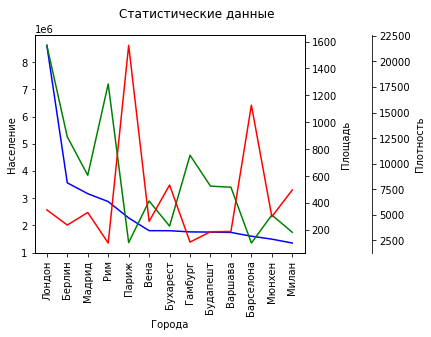

In [11]:
fig, ax = plt.subplots()
fig.suptitle("Статистические данные")
ax.set_ylabel("Население")
ax.set_xlabel("Города")

ax_area, ax_density = ax.twinx(), ax.twinx() 
ax_area.set_ylabel("Площадь")
ax_density.set_ylabel("Плотность")

rspine = ax_density.spines['right']
rspine.set_position(('axes', 1.25))
ax_density.set_frame_on(True)
ax_density.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

city_frame["population"].plot(ax=ax, 
                              style="b-",
                              xticks=range(len(city_frame.index)),
                              use_index=True, 
                              rot=90)

city_frame["area"].plot(ax=ax_area, 
                        style="g-",
                        use_index=True, 
                        rot=90)

city_frame["density"].plot(ax=ax_density, 
                           style="r-",
                           use_index=True, 
                           rot=90)

plt.show()